In [1]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import subprocess

In [15]:
# First we need to loop over all the output files we created and calculate the surface counts for each of them

dataDir = '../../geant/data/sourceshielding2/'
dataFileBase = 'output'

nParticles = 100000

lead = 2
while lead <= 10:
    poly = 2
    while poly <= 10:
        
        file = dataDir + dataFileBase + '_' + str(lead) + '_' + str(poly) + '_' + str(nParticles) + '.root'
        
        # This is a hilariously slow way to do this tbh, but this is how to suppress error messages
        # For some reason although this notebook is running under root environment, CLING seems to
        # not be able to find libraries/header files. Activating the conda env for every single call
        # is stupidly slow but it works with relatively negligible overhead, so... - Lars
        #subprocess.run('. $CONDA_PREFIX/etc/profile.d/conda.sh; conda activate cern_root; ../build/DetectorSurfaceCounts ' + file, shell=True)
        subprocess.run('../build/DetectorSurfaceCounts ' + file, shell=True)
        
        poly += 2
    lead += 2

In [18]:
# Extract data from post analysis root files now

gammaEnteringCounts = []

lead = 2
while lead <= 10:
    row = []
    poly = 2
    while poly <= 10:
        
        file = dataDir + dataFileBase + '_' + str(lead) + '_' + str(poly) + '_' + str(nParticles) + '_counts.root'
        
        entering = uproot.open(file)['Entering'].arrays(library='pd')
        
        row.append(entering[(entering['Side'] == 'Total') & (entering['Name'] == 'gamma')]['Count'].iloc[0])
        
        poly += 2
        
    gammaEnteringCounts.append(row)
    
    lead += 2
    
gammaEnteringCounts = np.array(gammaEnteringCounts)

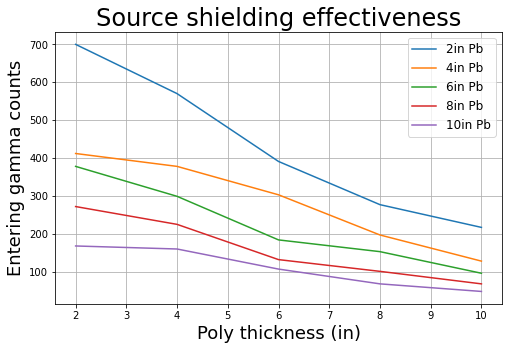

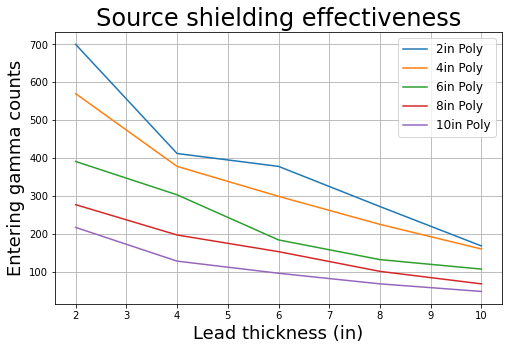

In [20]:
fig, ax = plt.subplots(figsize=(8,5))

poly = np.arange(2, 11, 2)
for idx, row in enumerate(gammaEnteringCounts):
    lead = 2 * (idx + 1)
    
    ax.plot(poly, row, label = str(lead) + "in Pb")

ax.legend(fontsize=12)
ax.set_title('Source shielding effectiveness', fontsize=24)
ax.set_xlabel('Poly thickness (in)', fontsize=18)
ax.set_ylabel('Entering gamma counts', fontsize=18)

ax.grid()

plt.show()

fig, ax = plt.subplots(figsize=(8,5))

lead = np.arange(2, 11, 2)
for idx, row in enumerate(gammaEnteringCounts.T):
    poly = 2 * (idx + 1)
    
    ax.plot(lead, row, label = str(poly) + "in Poly")

ax.legend(fontsize=12)
ax.set_title('Source shielding effectiveness', fontsize=24)
ax.set_xlabel('Lead thickness (in)', fontsize=18)
ax.set_ylabel('Entering gamma counts', fontsize=18)

ax.grid()

plt.show()